In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2025-05-07 09:07:55.955073: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-07 09:07:55.958951: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-07 09:07:55.971174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746626875.991958   11358 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746626875.998077   11358 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746626876.014950   11358 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
data = pd.read_csv('DataSets/Folds.csv')
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
data.corr()['PE'].sort_values(ascending=False)

PE    1.000000
AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64

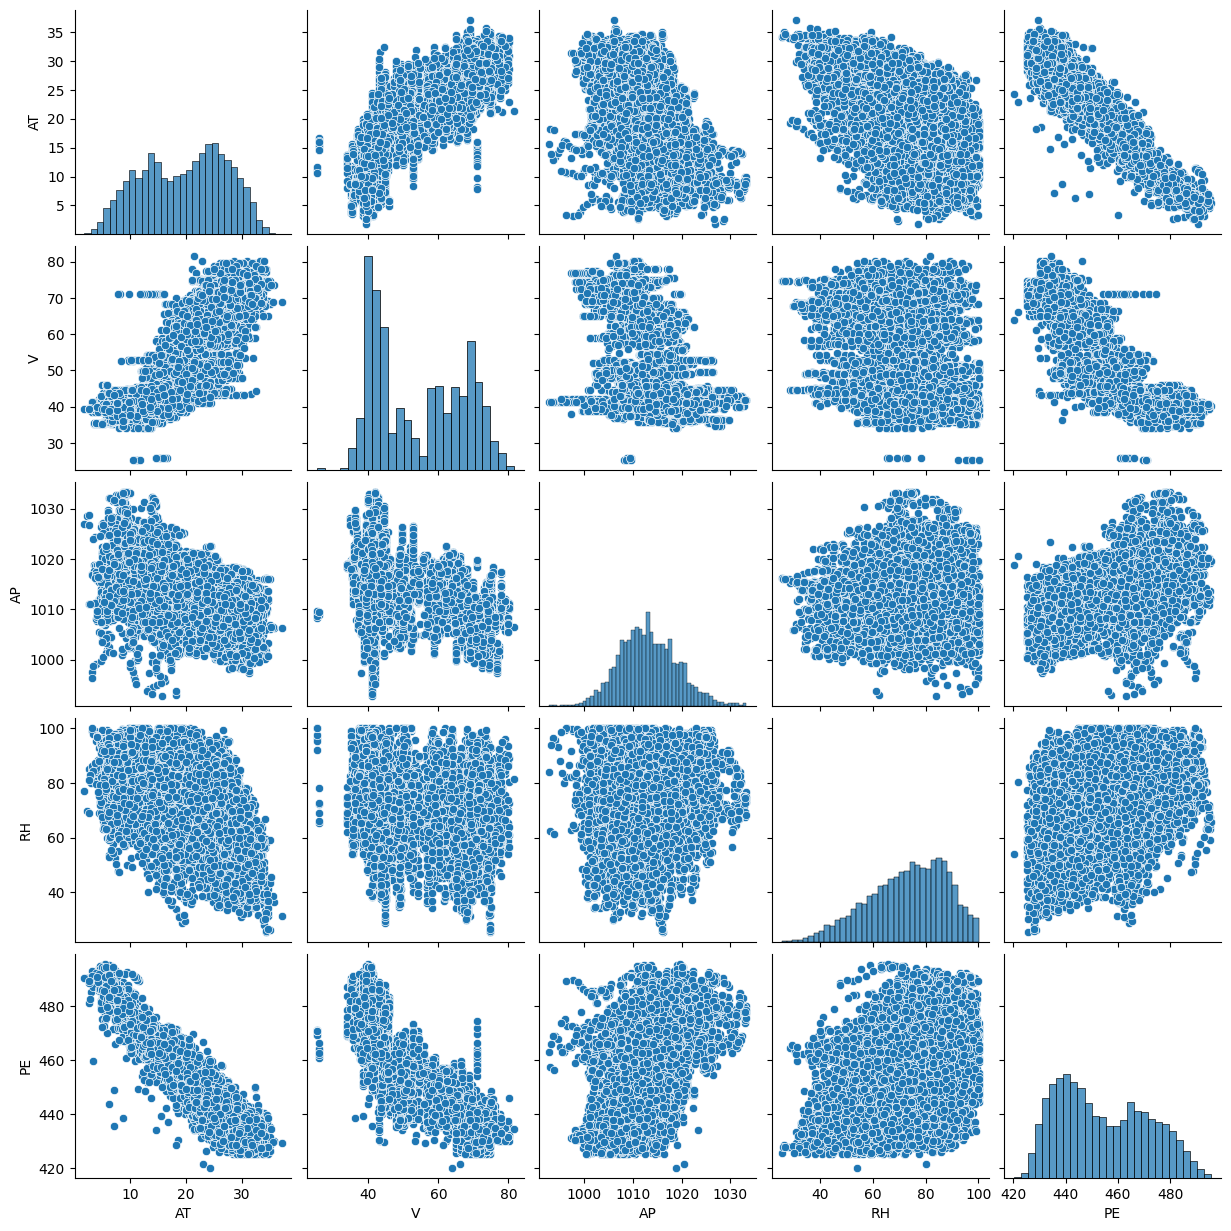

In [6]:
sns.pairplot(data)
plt.grid(True)
plt.show()

<Axes: >

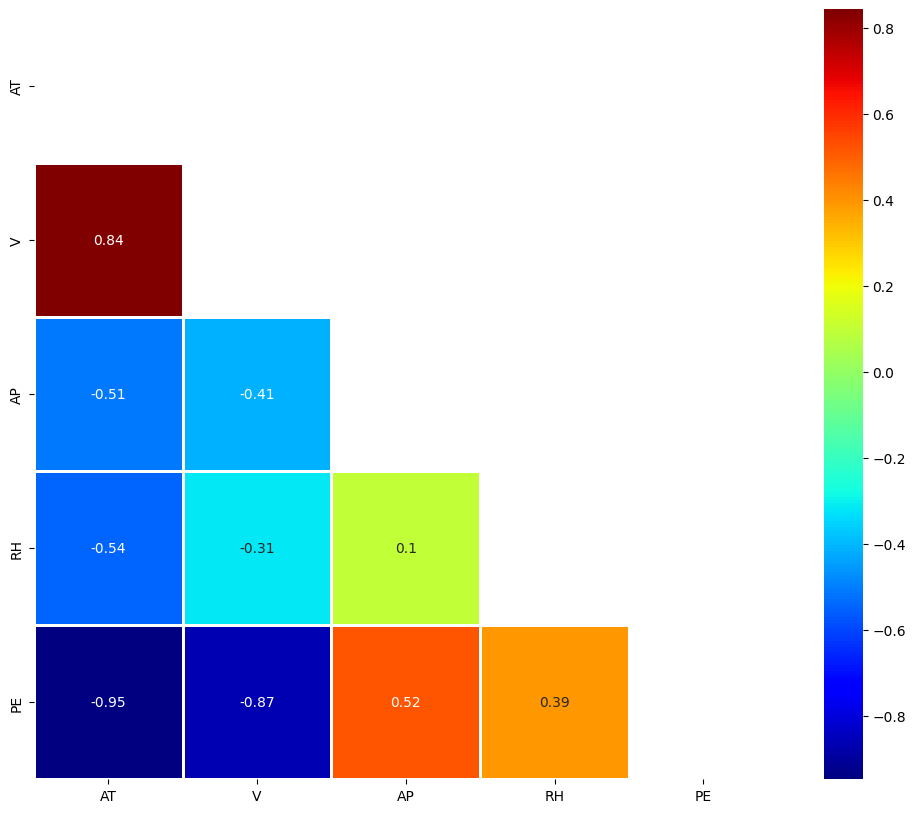

In [7]:
plt.figure(figsize=(12,10))
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=data.corr(),cmap='jet', annot=True, lw=1, linecolor='#FFFFFF', mask=mask)

Nota: Tener en cuenta que AT y V tienen un un correlación negativa con respecto a PE

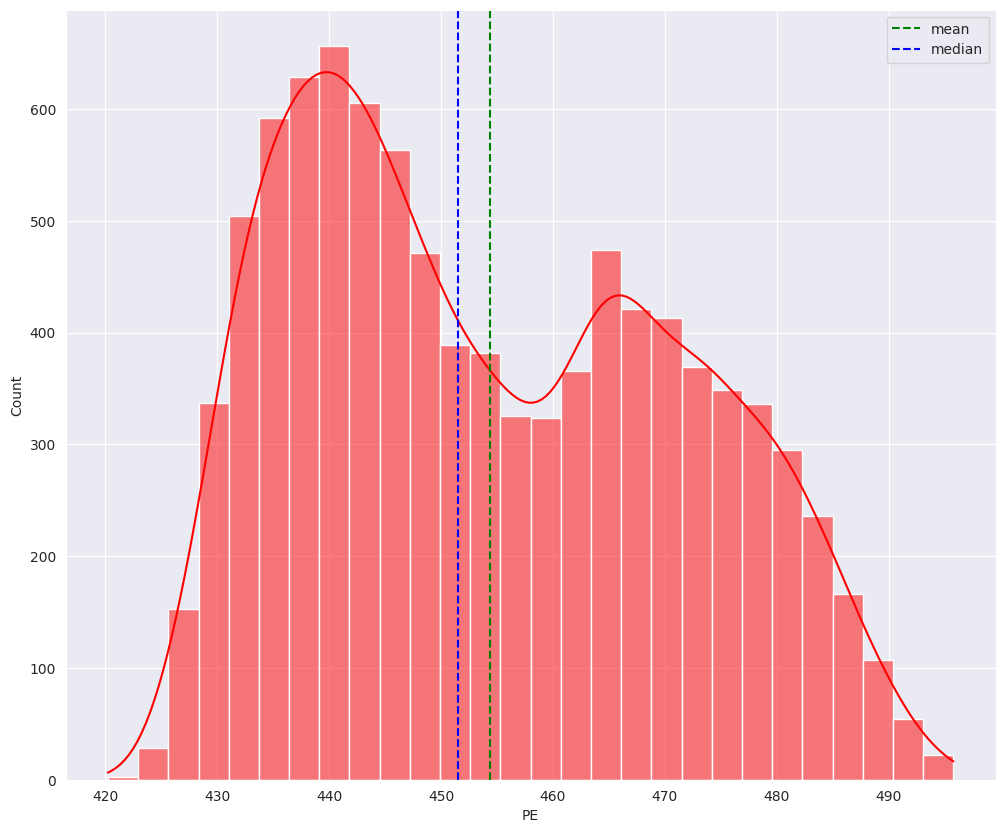

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.histplot(data, x='PE', color='red', kde=True)
plt.axvline(x=data['PE'].mean(), color='green', ls='--', label='mean')
plt.axvline(x=data['PE'].median(), color='blue', ls='--', label='median')
plt.legend()
plt.show()

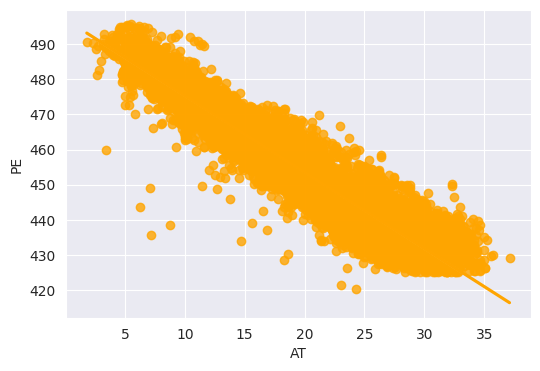

In [9]:
plt.figure(figsize=(6, 4))
sns.regplot(data, x='AT', y='PE', color='orange')
plt.show()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
rna = Sequential()
rna.add(Dense(28, activation='relu'))
# rna.add(Dropout(0.3))
rna.add(Dense(20, activation='relu'))
rna.add(Dense(1))
rna.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
rna.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
list_ = [x for x in data.columns if x != 'PE']

x = np.array(data[list_])
y = np.array(data[['PE']])

scaler = StandardScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
history = rna.fit(x_train, y_train, epochs=208, batch_size=32,
                  validation_data=(x_test, y_test),
                  callbacks=EarlyStopping(monitor='val_loss', patience=4))


Epoch 1/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 2/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 3/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0552 - val_mse: 0.0552
Epoch 4/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0542 - val_mse: 0.0542
Epoch 5/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 6/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0548 - val_mse: 0.0548
Epoch 7/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 8/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0548 - val_mse: 0.0548
Epoch 9/208
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

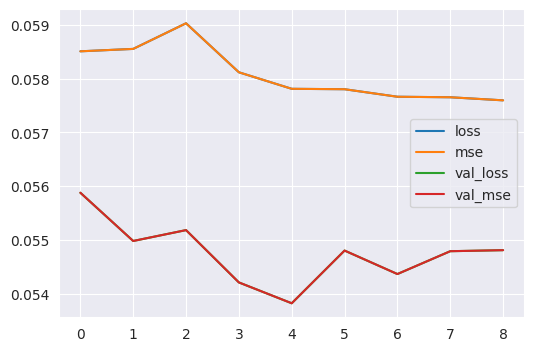

In [29]:
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.show()

In [30]:
rna.evaluate(x_test, y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0539 - mse: 0.0539 


[0.05480777472257614, 0.05480777472257614]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


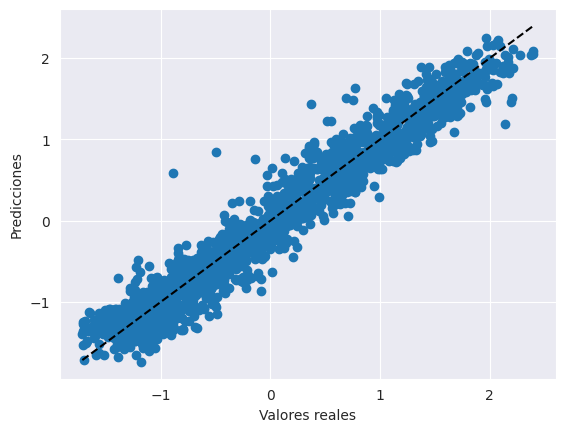

In [31]:
y_pred = rna.predict(x_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

In [32]:
r2_score(y_test, y_pred)

0.9452771383972548

In [33]:
mean_squared_error(y_test, y_pred)

0.05480777233925668